# Tarea 2 ICM3920 Fluidodinámica Computacional

### Alumno: Alonso Espinoza Correa

In [1]:
import numpy as np
from sympy import symbols, Eq, solve, cos, sin, expand, simplify, pprint
from sympy import lambdify
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import time

**Nota:** Muchos de los códigos fueron complementados Chat-GPT y Github-Copilot. Por transparencia, cité en cada ejemplo ambas inteligencias interficiales. Cada pregunta tiene su introducción conceptual, descripción a grandes rasos del código implementado en base a la introducción descrita, el propio código, conclusiones sobre los resultados y citas bibliográficas.

## 1) Implemente el método de Jacobi en Python. Asegúrese que existen condiciones de convergencia (puede usar numpy para analizar la matriz). Compare el desempeño de su rutina con el método estándar de numpy para resolver sistemas lineales y discuta.

Un sistema lineal está representado por la siguiente ecuación:
$$ A\vec{x} = \vec{b}$$
Donde $A \in \R^{nxn}$; $\vec{x}, \vec{b} \in \R^n$. La solución de este sistema está dada por:

$$ \vec{x} = A^{-1}\vec{b}$$
Computacionalmente, invertir la matriz $A$ puede ser muy costoso. Es por eso que existen diferentes métodos de resolución de sistemas lineales que consisten en simplificar de alguna forma la inversión de la matriz $A$. \\

**Método de Jacobi**

El método de Jacobi es un método utilizado para disminuir el costo computacional de la resolución de sistemas lineales. Este método propone la siguiente relación.

$$ A = D + R$$

Donde $D$ es la diagonal de $A$, y $R$ es el resto de la matriz. De esta forma, el sistema lineal puede ser reescrito como:

$$ 
(D + R)\vec{x} = \vec{b}\\
D \vec{x} = \vec{b} - R\vec{x}\\
\vec{x} = D^{-1}(\vec{b} - R\vec{x})
$$

Este método puede ser resuelto mediante iteración del vector $\vec{x}$. 

$$ \vec{x}_{n+1} = D^{-1}(\vec{b} - R\vec{x}_n) $$

La ventaja que tiene este método es que la inversa de la matriz $D$ es simplemente el inverso multiplicativo de cada término de su diagonal, haciendo que esta operación sea mucho menos costosa computacionalmente que la matriz $A$.

Este método sólo asegura convergencia si es que la matriz $A$ es diagonalmente dominante. Es decir, para cada fila de la matriz $A$, la magnitud del valor de la diagonal debe ser mayor que la suma de la magnitud de los otros términos de la fila.

$$ |a_{ii}| > \sum_{i \neq j}|a_{ij}| \text{ para todo } i =1,..,n$$


**Código Implementado**

Se crea una función `jacobi_iteration` que recibe la matriz $A$, el vector $\vec{b}$ y un vector para empezar la iteración $\vec{x}_0$. Primero, se revisa que la matriz $A$ sea diagonalmente dominante, iterando sobre cada fila de la matriz $A$. Posteriormente, se crea la matriz diagonal $D$ accediendo a la posición `i,i` de la matriz $A$ y almacenándola en una nueva variable, y se obtiene la matriz $R$ utilizando $R = A - D$. Se crea la también matriz inversa de $D$ utilizando el inverso multiplicativo de los valores de la diagonal. Posteriormente, se calcula $\vec{x}_{n+1}$ con la fórmula mostrada anteriormente, y en caso de que la norma del vector $\vec{x}_{n+1} - \vec{x}_n$ sea menor a un cierto valor de tolerancia, significa que se alcanzó el valor de la solución, deteniendo la iteración y retornando el valor 


In [2]:
def matriz_diagonal(lista):
    n = len(lista)
    return [[lista[i] if i == j else 0 for j in range(n)] for i in range(n)]

def jacobi_iteration(A, b, x0, tol=1e-12, max_iterations=100):
    """
    Solves a system of linear equations Ax = b using the Jacobi iteration method.

    Args:
        A (list): The coefficient matrix.
        b (list): The right-hand side vector.
        x0 (list): The initial guess for the solution vector.

    Returns:
        list: The approximate solution vector.
    """
    x_n = x0
    iteration = 0
    A = np.array(A)
    b = np.array(b)
    x0 = np.array(x0)
    # Primero: Revisar criterio de convergencia

    # |a_ii| > sum(|a_ij|) con j != i para todo i
    # Para cada fila, el valor i,i debe ser mayor que la suma de los otros valores en la fila (en magnitud)
    for i in range(len(A)):
        if abs(A[i, i]) < np.sum(np.abs(A[i, :])) - abs(A[i, i]):
            print("Warning: Matrix A is not diagonally dominant. Convergence is not guaranteed.")
            break

    # Una vez que demostramos que es diagonalmente dominante, podemos proceder con el método de Jacobi

    diagonal_array = np.array([A[i][i] for i in range(len(A))])
    inverse_diagonal_array = np.array([1 / A[i][i] for i in range(len(A))])
    D_matrix = matriz_diagonal(diagonal_array)
    R_matrix = A - D_matrix
    D_inv = matriz_diagonal(inverse_diagonal_array)
    
    x_new = D_inv @ (b - (R_matrix @ x_n))

    while np.linalg.norm(x_new - x_n, ord=np.inf) > tol and iteration < max_iterations:
        x_n = x_new
        x_new = D_inv @ (b - (R_matrix @ x_n))
        iteration += 1

    if iteration < max_iterations:
        # print(f"Converged in {iteration} iterations.")
        return x_new.tolist()
    

# Example usage:
A = np.array([[10.0, -1.0, 2.0],
                  [-1.0, 11.0, -1.0],
                  [2.0, -1.0, 10.0]])

b = np.array([6.0, 25.0, -11.0])

x0 = np.zeros(len(b)) # Initial guess (can be any vector)

initial_time = time.time()
jacobi_solution = jacobi_iteration(A, b, x0)
final_time = time.time()
jacobi_time = final_time - initial_time
print("Jacobi solution:", jacobi_solution)
print("Jacobi solution time taken:", jacobi_time)

initial_time = time.time()
numpy_solution = np.linalg.solve(A, b)
final_time = time.time()
numpy_time = final_time - initial_time
print("\nNumpy solution:", numpy_solution)
print("Numpy solution time taken:", numpy_time)

print(f"Numpy method takes {numpy_time/jacobi_time * 100:.2f}% of the time of Jacobi's method")


Jacobi solution: [1.04326923076941, 2.2692307692306475, -1.0817307692305893]
Jacobi solution time taken: 0.0004582405090332031

Numpy solution: [ 1.04326923  2.26923077 -1.08173077]
Numpy solution time taken: 4.696846008300781e-05
Numpy method takes 10.25% of the time of Jacobi's method


Se puede ver que, si bien la solución es prácticamente la misma, la solución implementada utilizando el método de `np.linalg.solve` resulta más rápido que el método de Jacobi implementado.

**Fuentes:**
1. ICM3920-Clase9
2. ChatGPT
3. GitHub Copilot

## 2) Resuelva el sistema lineal planteado en la clase 10, y compare la solución con aquella del sistema perturbado. Estima el número de condicionamiento usando la norma euclidiana (Conviene usar el paquete numpy para operaciones algebraicas).

Un cierto sistema lineal

$$ A\vec{x} = \vec{b}$$

Puede ser generado por datos experimentales que posean cierta incertidumbre, obtenido al lineallizar un sistema, entre otros. Por lo tanto, nos interesaría que frente a pequeñas variaciones de los coeficientes de $A$ o de $\vec{b}$, la solución no variara tanto. Esta propiedad se conoce como el condicionamiento de la matriz, y se puede predecir este tipo de comportamiento mediante el número de condicionamiento, definido por (para norma euclidiana):

$$ 
\kappa(A) = \frac{\sigma_{max}(A)}{\sigma_{min}(A)}
$$ 

Donde $\sigma_{max}(A)$ y $\sigma_{min}(A)$ son los valores singulares de la matriz, definidos como la raíz de los valores propios de $A\cdot A^T$.

Para estudiar el comportamiento de un cierto sistema lineal, se define el sisguiente sistema:

$$
\begin{pmatrix}
4.218613 & 6.327917\\
3.141592 & 4.712390
\end{pmatrix}
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
= 
\begin{pmatrix}
10.546530\\
7.853982
\end{pmatrix}
$$

Y un sistema perturbado

$$
\begin{pmatrix}
4.218611 & 6.327917\\
3.141594 & 4.712390
\end{pmatrix}
\begin{pmatrix}
x_3\\
x_4
\end{pmatrix}
= 
\begin{pmatrix}
10.546530\\
7.853980
\end{pmatrix}
$$

**Código Implementado**

Se resuelve cada sistema lineal con el método `np.linalg.solve`, se calcula el número de condicionamiento de la matriz calculando los valores propios de la matriz $A\cdot A^T$ con el método `np.linalg.eig`. 

In [3]:
A1 = np.array([[4.218613, 6.327917],
               [3.141592, 4.712390]])
b1 = np.array([10.546530, 7.853982])
x1 = np.linalg.solve(A1, b1)
print(f"Solución del problema 1: {x1}")

A2 = np.array([[4.218611, 6.327917],
               [3.141594, 4.712390]])
b2 = np.array([10.546530, 7.853980])
x2 = np.linalg.solve(A2, b2)
print(f"Solución del problema 2: {x2}")

# Se puede ver que ante una pequeña perturbación en los datos, la solución cambia significativamente,
# Esto significa que nuestro problema está mal condicionado.
# Para demostrarlo, calcularé el número de condicionamiento de la matriz A1 y A2

# cond_A1 = np.linalg.cond(A1)
# cond_A2 = np.linalg.cond(A2)
# print(f"Número de condicionamiento de A1: {cond_A1}")
# print(f"Número de condicionamiento de A2: {cond_A2}")

# Compute eigenvalues and eigenvectors
eigenvalues_1, eigenvectors = np.linalg.eig(A1 @ A1.T)
singular_values_1 = [np.sqrt(ev) for ev in eigenvalues_1]
max_singular_value_1 = max(singular_values_1)
min_singular_value_1 = min(singular_values_1)
cond_A1 = max_singular_value_1 / min_singular_value_1
print(f"Número de condicionamiento de A1: {cond_A1:.2f}")

# Compute eigenvalues and eigenvectors
eigenvalues_2, eigenvectors = np.linalg.eig(A2 @ A2.T)
singular_values_2 = [np.sqrt(ev) for ev in eigenvalues_2]
max_singular_value_2 = max(singular_values_2)
min_singular_value_2 = min(singular_values_2)
cond_A2 = max_singular_value_2 / min_singular_value_2
print(f"Número de condicionamiento de A2: {cond_A2:.2f}")


Solución del problema 1: [1. 1.]
Solución del problema 2: [-5.  5.]
Número de condicionamiento de A1: 5524036.34
Número de condicionamiento de A2: 15433221.66


Se puede ver que las soluciones de los sistemas son:

$$
\begin{pmatrix}
x_1\\
x_2
\end{pmatrix}
= 
\begin{pmatrix}
1\\
1
\end{pmatrix}
$$


$$
\begin{pmatrix}
x_3\\
x_4
\end{pmatrix}
= 
\begin{pmatrix}
-5\\
5
\end{pmatrix}
$$

Cambió significativamente la solución al perturbar pequeñamente el sistema. Por tanto, se esperaría que el número de condicionamiento sea muy grande. Los números de condicionamiento obtenidos fueron:

$$
\kappa(A_1) = 5524036.34\\
\kappa(A_2) = 15433221.66\\
$$

Se puede ver que el número de condicionamiento es mucho mayor a 1, siendo un indicio de lo mal condicionado del sistema. En caso de que se quisiese resolver un sistema con esta matriz, se deberá preacondicionar la matriz.

**Fuentes:**
1. ICM3920-Clase9
2. https://cms.dm.uba.ar/Members/slaplagn/archivos/alc2c2022/clase8-slides.pdf
3. https://www.mate.unlp.edu.ar/practicas/70_18_0911201012951.pdf
4. ChatGPT
5. GitHub Copilot

## 3) Use el método de Newton para resolver el siguiente sistema no lineal:

$$ 0 = x^2 + y^2 - 2\cos x\\
0 = xy + \sin x - y^3$$

El método de Newton es un método que nos permite encontrar la raíz de una función utilizando su derivada. Recordemos que por definición, la derivada representa la pendiente de la recta tangente a la función en ese punto. Por lo tanto, se puede definir la ecuación de la recta pendiente en función de la derivada en un cierto punto $x_n$.

$$
y - f(x_n) = f'(x_n)(x - x_n)
$$

El valor de $x$ que genera $y=0$ es:

$$
x = x_n - \frac{f(x_n)}{f'(x_n)}
$$

Por lo tanto, si es que $x_n = x$, significa que encontré una raíz de la función. Es un proceso iterativo que se detiene hasta que $x = x_n$.

Si bien esta definición fue hecha para una función 1D, se puede generalizar este método para una función $\vec{f}(\vec{x}) \in \R^n$ por la siguiente expresión:

$$
\vec{x}_{n+1} = \vec{x}_n - J^{-1}(\vec{x}_n) \cdot \vec{f}(\vec{x}_n)
$$
Donde $ J^{-1}(\vec{x}_n)$ es el jacobiano de $\vec{f}(\vec{x})$ evaluado en $\vec{x}_n$

**Código Implementado**

Se presenta el siguiente sistema en 2D:

$$
\vec{f}(x,y) = 
\begin{pmatrix}
x^2 - y^2 - 2\cos x\\
xy + \sin y - y^3
\end{pmatrix}
=
\begin{pmatrix}
f_1(x,y)\\
f_2(x,y)
\end{pmatrix}
$$

Cuyo jacobiano está dado por:
$$
J(\vec{x}) = 
\begin{pmatrix}
\frac{\partial f_1}{\partial x} & \frac{\partial f_1}{\partial y}\\
\frac{\partial f_2}{\partial x} & \frac{\partial f_2}{\partial y}
\end{pmatrix}
=
\begin{pmatrix}
2x + 2\sin x & -2y\\
y + \cos y & -3y^2
\end{pmatrix}

$$

Por tanto, dado un vector inicial $\vec{x}_0$, se itera hasta que la norma de $J^{-1}(\vec{x}_n) \cdot \vec{f}(\vec{x}_n)$ sea menor que un cierto valor de tolerancia (lo cual quiere decir que $\vec{x}_{n+1} = \vec{x}_n$)

In [4]:
# Definimos variables simbólicas
x, y = symbols('x y')

# Sistema de ecuaciones
f_xy = [
    (x**2) - (y**2) - (2*cos(x)),
    (x*y) + sin(x) - (y**3)
]

# Jacobiano
J_xy = [
    [2*x + 2*sin(x), -2*y],
    [y + cos(x), x - 3*(y**2)]
]

# Punto inicial
xy_0 = np.array([0.01, 0.01])

def newton_raphson(f_xy, J_xy, xy_0, tol=1e-6, max_iter=100):
    xy_n = xy_0
    for i in range(max_iter):
        # Evaluar funciones en el punto actual
        f_val = np.array([
            f_xy[0].subs({x: xy_n[0], y: xy_n[1]}),
            f_xy[1].subs({x: xy_n[0], y: xy_n[1]})
        ], dtype=float)

        # Evaluar Jacobiano en el punto actual
        J_val = np.array([
            [J_xy[0][0].subs({x: xy_n[0], y: xy_n[1]}), J_xy[0][1].subs({x: xy_n[0], y: xy_n[1]})],
            [J_xy[1][0].subs({x: xy_n[0], y: xy_n[1]}), J_xy[1][1].subs({x: xy_n[0], y: xy_n[1]})]
        ], dtype=float)

        # Resolver el sistema lineal
        delta_xy = np.linalg.solve(J_val, -f_val)
        xy_n = xy_n + delta_xy

        # Criterio de convergencia
        if np.linalg.norm(delta_xy) < tol:
            return xy_n, i+1
    
    raise ValueError("No converge después de las iteraciones máximas")

# Ejecutar
solution, iterations = newton_raphson(f_xy, J_xy, xy_0)
print(f"Solution: x = {solution[0]}, y = {solution[1]} found in {iterations} iterations")

comprobar_1 = f_xy[0].subs({x: solution[0], y: solution[1]})
comprobar_2 = f_xy[1].subs({x: solution[0], y: solution[1]})
print(f"Comprobación 1: {comprobar_1}, Comprobación 2: {comprobar_2}")

Solution: x = 1.5164619839311868, y = 1.4802167827996275 found in 27 iterations
Comprobación 1: -4.44089209850063E-16, Comprobación 2: 8.88178419700125E-16


Se obtiene la siguiente solución:

$$
\begin{pmatrix}
x\\
y
\end{pmatrix}
=
\begin{pmatrix}
1.516\\
1.480
\end{pmatrix}
$$

La cual al evaluarla en la función nos entrega valores del orden de $10^{-16}$, siendo prácticamente mínimo el error. Cabe destacar que al tener más de una posible solución, el método de Newton nos entrega sólamente la solución más cercana a $\vec{x}_0$, por lo que el valor obtenido de la iteración pudiese llegar a ser otro si es que se cambia el vector inicial.

**Fuente:**
1. ICM3920-Clase10
2. https://www.paginaspersonales.unam.mx/files/977/2016-02-21-023809_METODO_DE_NEWTON_cla.pdf
4. ChatGPT
5. GitHub Copilot

## 4) Encuentre el polinomio que interpole los siguientes puntos, usando la base de Newton:
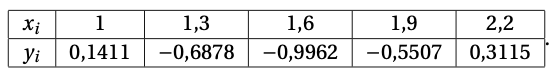
## Agregue el punto $(2.3; \sin(2.3))$ y encuentre también el nuevo polinomio.

Dado un conjunto de $n$ puntos $(x_i, y_i)$, nos interesa encontrar un polinomio de grado $n-1$ que pase por todos estos puntos. Existen diferentes formas de encontrar el único polinomio que pasa por los $n$ puntos. Para este ejercicio, se utilizará el método de Newton, el cual está definido por:

$$ N(x) = \sum_{i=0}^n a_i n_i(x) $$

Donde la base de Newton $n_i(x) se define como:

$$  n_i(x) = \prod_{k=0}^{i-k} (x-x_k) $$

Las constantes $a_i$ pueden ser determinadas con el siguiente sistema lineal (en este caso, se muestra el caso donde $n = 6$, que es justamente el caso del ejercicio)


$$
\scriptsize
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0\\
1 & x_1 - x_0 & 0 & 0 & 0 & 0\\
1 & x_2 - x_0 & (x_2 - x_0)(x_2 - x_1) & 0 & 0 & 0\\
1 & x_3 - x_0 & (x_3 - x_0)(x_3 - x_1) & (x_3 - x_0)(x_3 - x_1)(x_3 - x_2) & 0 & 0\\
1 & x_4 - x_0 & (x_4 - x_0)(x_4 - x_1) & (x_4 - x_0)(x_4 - x_1)(x_4 - x_2) & (x_4 - x_0)(x_4 - x_1)(x_4 - x_2)(x_4 - x_3) & 0\\
1 & x_5 - x_0 & (x_5 - x_0)(x_5 - x_1) & (x_5 - x_0)(x_5 - x_1)(x_5 - x_2) & (x_5 - x_0)(x_5 - x_1)(x_5 - x_2)(x_5 - x_3) & (x_5 - x_0)(x_5 - x_1)(x_5 - x_2)(x_5 - x_3)(x_5 - x_4)\\
\end{pmatrix}
\begin{pmatrix}
a_0\\
a_1\\
a_2\\
a_3\\
a_4\\
a_5\\
\end{pmatrix}
=
\begin{pmatrix}
y_0\\
y_1\\
y_2\\
y_3\\
y_4\\
y_5\\
\end{pmatrix}
$$

**Código Implementado**

Se plantean los polinomios $n_i(x)$ con el método `symbols` de *sympy*, y se resuelve el sistema de ecuaciones planteado arriba utilizando el método `solve` de la misma librería, obteniendo así los coeficientes $a_i$. Para comprobar los resultados, se grafica la función original y el polinomio obtenido

{a0: 0.141100000000000, a1: -2.76300000000000, a2: 2.89166666666667, a3: 1.44074074074074, a4: -2.93518518518519, a5: 0.751831501831546}
                   5                     4                     3               ↪
0.751831501831546⋅x  - 8.94983719983755⋅x  + 37.3733770858782⋅x  - 68.26522893 ↪

↪        2                                        
↪ 77306⋅x  + 53.7010072853086⋅x - 14.4700497354501


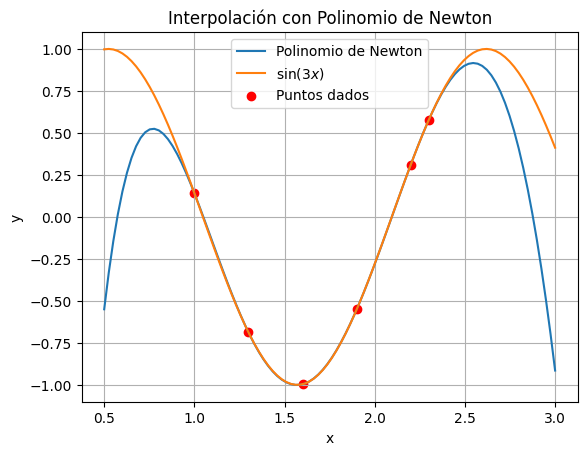

In [5]:
values = np.array([[1, 0.1411], [1.3, -0.6878], [1.6, -0.9962], [1.9, -0.5507], [2.2, 0.3115], [2.3, 0.5784]]) # Valores (xi. yi)

x0 = values[0][0]
x1 = values[1][0]
x2 = values[2][0]
x3 = values[3][0]
x4 = values[4][0]
x5 = values[5][0]


x, a0, a1, a2, a3, a4, a5= symbols('x a0 a1 a2 a3 a4 a5')

n0 = 1
n1 = x - values[0][0]
n2 = n1 * (x - values[1][0])
n3 = n2 * (x - values[2][0])
n4 = n3 * (x - values[3][0])
n5 = n4 * (x - values[4][0])

# Encontrar el valor de los coeficientes ai

first = a0
second = first + (a1 * (x1 - x0))
third = a0 + (a1 * (x2 - x0)) + (a2 * ((x2 - x0) * (x2 - x1)))
fourth = a0 + (a1 * (x3 - x0)) + (a2 * ((x3 - x0) * (x3 - x1))) + (a3 * (x3 - x0) * (x3 - x1) * (x3 - x2))
fifth = a0 + (a1 * (x4 - x0)) + (a2 * ((x4 - x0) * (x4 - x1))) + (a3 * (x4 - x0) * (x4 - x1) * (x4 - x2)) + (a4 * (x4 - x0) * (x4 - x1) * (x4 - x2) * (x4 - x3))
sixth = a0 + (a1 * (x5 - x0)) + (a2 * ((x5 - x0) * (x5 - x1))) + (a3 * (x5 - x0) * (x5 - x1) * (x5 - x2)) + (a4 * (x5 - x0) * (x5 - x1) * (x5 - x2) * (x5 - x3)) + (a5 * (x5 - x0) * (x5 - x1) * (x5 - x2) * (x5 - x3) * (x5 - x4))

eq0 = Eq(first, values[0][1])
eq1 = Eq(second, values[1][1])
eq2 = Eq(third, values[2][1])
eq3 = Eq(fourth, values[3][1])
eq4 = Eq(fifth, values[4][1])
eq5 = Eq(sixth, values[5][1])

solution = solve((eq0, eq1, eq2, eq3, eq4, eq5), (a0, a1, a2, a3, a4, a5))
# solution = solve((eq0, eq1), (a0, a1))
print(solution)

polinomio_newton = (solution[a0] * n0) + (solution[a1] * n1) + (solution[a2] * n2) + (solution[a3] * n3) + (solution[a4] * n4) + (solution[a5] * n5)
# Expandir y simplificar el polinomio
polinomio_expandido = expand(polinomio_newton)

# Mostrar bonito
pprint(polinomio_expandido)


# Plotear el polinomio de Newton
x_vals = np.linspace(0.5, 3, 100)
y_vals = [polinomio_newton.subs(x, val) for val in x_vals]
plt.plot(x_vals, y_vals, label='Polinomio de Newton')
plt.plot(x_vals, np.sin(3 * x_vals), label=f'$\sin (3x)$')
plt.scatter(values[:,0], values[:,1], color='red', label='Puntos dados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolación con Polinomio de Newton')
plt.legend()
plt.grid()
plt.show()

Los valores obtenidos de los coeficientes del polinomio son:
$$
\begin{pmatrix}
a_0\\
a_1\\
a_2\\
a_3\\
a_4\\
a_5\\
\end{pmatrix}
= 
\begin{pmatrix}
0.1411\\
-2.763\\
2.8917\\
1.4407\\
-2.9352\\
0.7518\\
\end{pmatrix}
$$

Obteniendo así el siguiente polinomio:
$$
N(x) = 0.7518x^5 - 8.9498x^4 + 37.3734x^3 - 68.2652x^2 + 53.7010x - 14.4700
$$

Se puede ver en el gráfico que es una buena aproximación en el intervalo de los puntos dados. Sin embargo, a medida que nos alejamos de los puntos medidos, se evidencia una clara diferencia entre la curva original y el polinomio obtenido

Fuentes:
1. ICM3920-Clase11
2. ChatGPT
3. GitHub Copilot

## 5) Encuentre el volumen bajo la función $f(x,y) = \cos^2(x+y) + \sin^2(xy)$, con $\{(x,y) \in \R \;|\; (\frac{x}{2})^2 + (\frac{y}{3})^2 \leq 0.5$\}. Use el método intuitivo (cuadratura de orden 0), y una cuadratura de Gauss de orden superior. Compare los resultados (con la misma discratización). Para los parámetros de la cuadratura use el paquete numpy

Supongamos que se desea calcular el valor de la siguiente integral

$$
\int_a^b f(x)dx
$$

Una forma de poder calcular este valor puede ser mediante la suma de Riemann o la fórmula de Newton-Cotes, la cual consiste en dividir el intervalo $[a,b]$ en $n$ subintervalos, calcular el área de un rectángulo de ancho $\Delta x = \frac{b-a}{n}$ y alto $f(x_i) = a + (\frac{b-a}{n})i\; ;i=1,..,n$. 

Otra forma más precisa de poder calcular esta integral es interpolando mediante los puntos $x_i$ mencionados anteriormente utilizando un polinomio $L(x)$. De esta forma, se tiene:

$$
\int_a^b f(x)dx = \int_a^b L(x)dx = \int_a^b (\sum_{i=0}^n f(x_i) l_i(x))dx = \sum_{i=0}^n f(x_i) \int_a^b l_i(x)dx = \sum_{i=0}^n f(x_i) w_i
$$

Donde $w_i$ es el resultado de integrar el componente de la base del polinomio $l_i(x)$ en el intervalo $[a,b]$. 

Esta fórmula es útil cuando se utiliza la cuadratura de Gauss-Legendre, en la que se integra en el intervalo $[-1,1]$ el polinomio de Legendre. Los pesos $\alpha_i$ de este polinomio se encuentran almacenados en *numpy* con el método `np.polynomial.legendre.leggauss`, el cual recibe el grado del polinomio y retorna tantos los puntos $x_i$ como los pesos $\alpha_i$. Lo único que hay que tener en consideración es que para poder utilizar este método de integración para cualquier intervalo $[a,b]$, primero se debe realizar un cambio de variable para poder tener una integral en el intervalo $[-1,1]$, resultando entonces en:

$$
\int_a^b f(x)dx = \frac{b-a}{2}\int_{-1}^{1} f(\frac{b-a}{2}x + \frac{a+b}{2})dx = \frac{b-a}{2} \sum_{i=0}^n \alpha_i f(\frac{b-a}{2}x_i + \frac{a+b}{2})
$$

Para el caso 2D, el razonamiento es similar. Si se desea integrar sobre una cierta región, esta región se puede dividir en rectángulos de ancho $a$ y alto $b$, se debe realizar un cambio de variable para integrar en la región $[-1,1]x[-1,1]$ y así poder usar la cuadratura de Gauss en 2D.

$$
\int \int _{\Omega} f(x,y) dxdy = \int_{-1}^1 \int_{-1}^1 f(x(\zeta, \eta), y(\zeta, \eta)) |J(\zeta, \eta)| d\zeta d\eta
$$

$$
\int_{-1}^1 \int_{-1}^1 f(x(\zeta, \eta), y(\zeta, \eta)) |J(\zeta, \eta)| d\zeta d\eta = \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j f(x(\zeta_i, \eta_j), y(\zeta_i, \eta_j)) |J(\zeta_i, \eta_j)
$$

Donde $|J(\zeta, \eta)|$ es el determinante de la matriz Jacobiana del cambio de variable.

Para un cambio de variable rectangular como el que se muestra en la figura, se pueden establecer las siguientes relaciones:

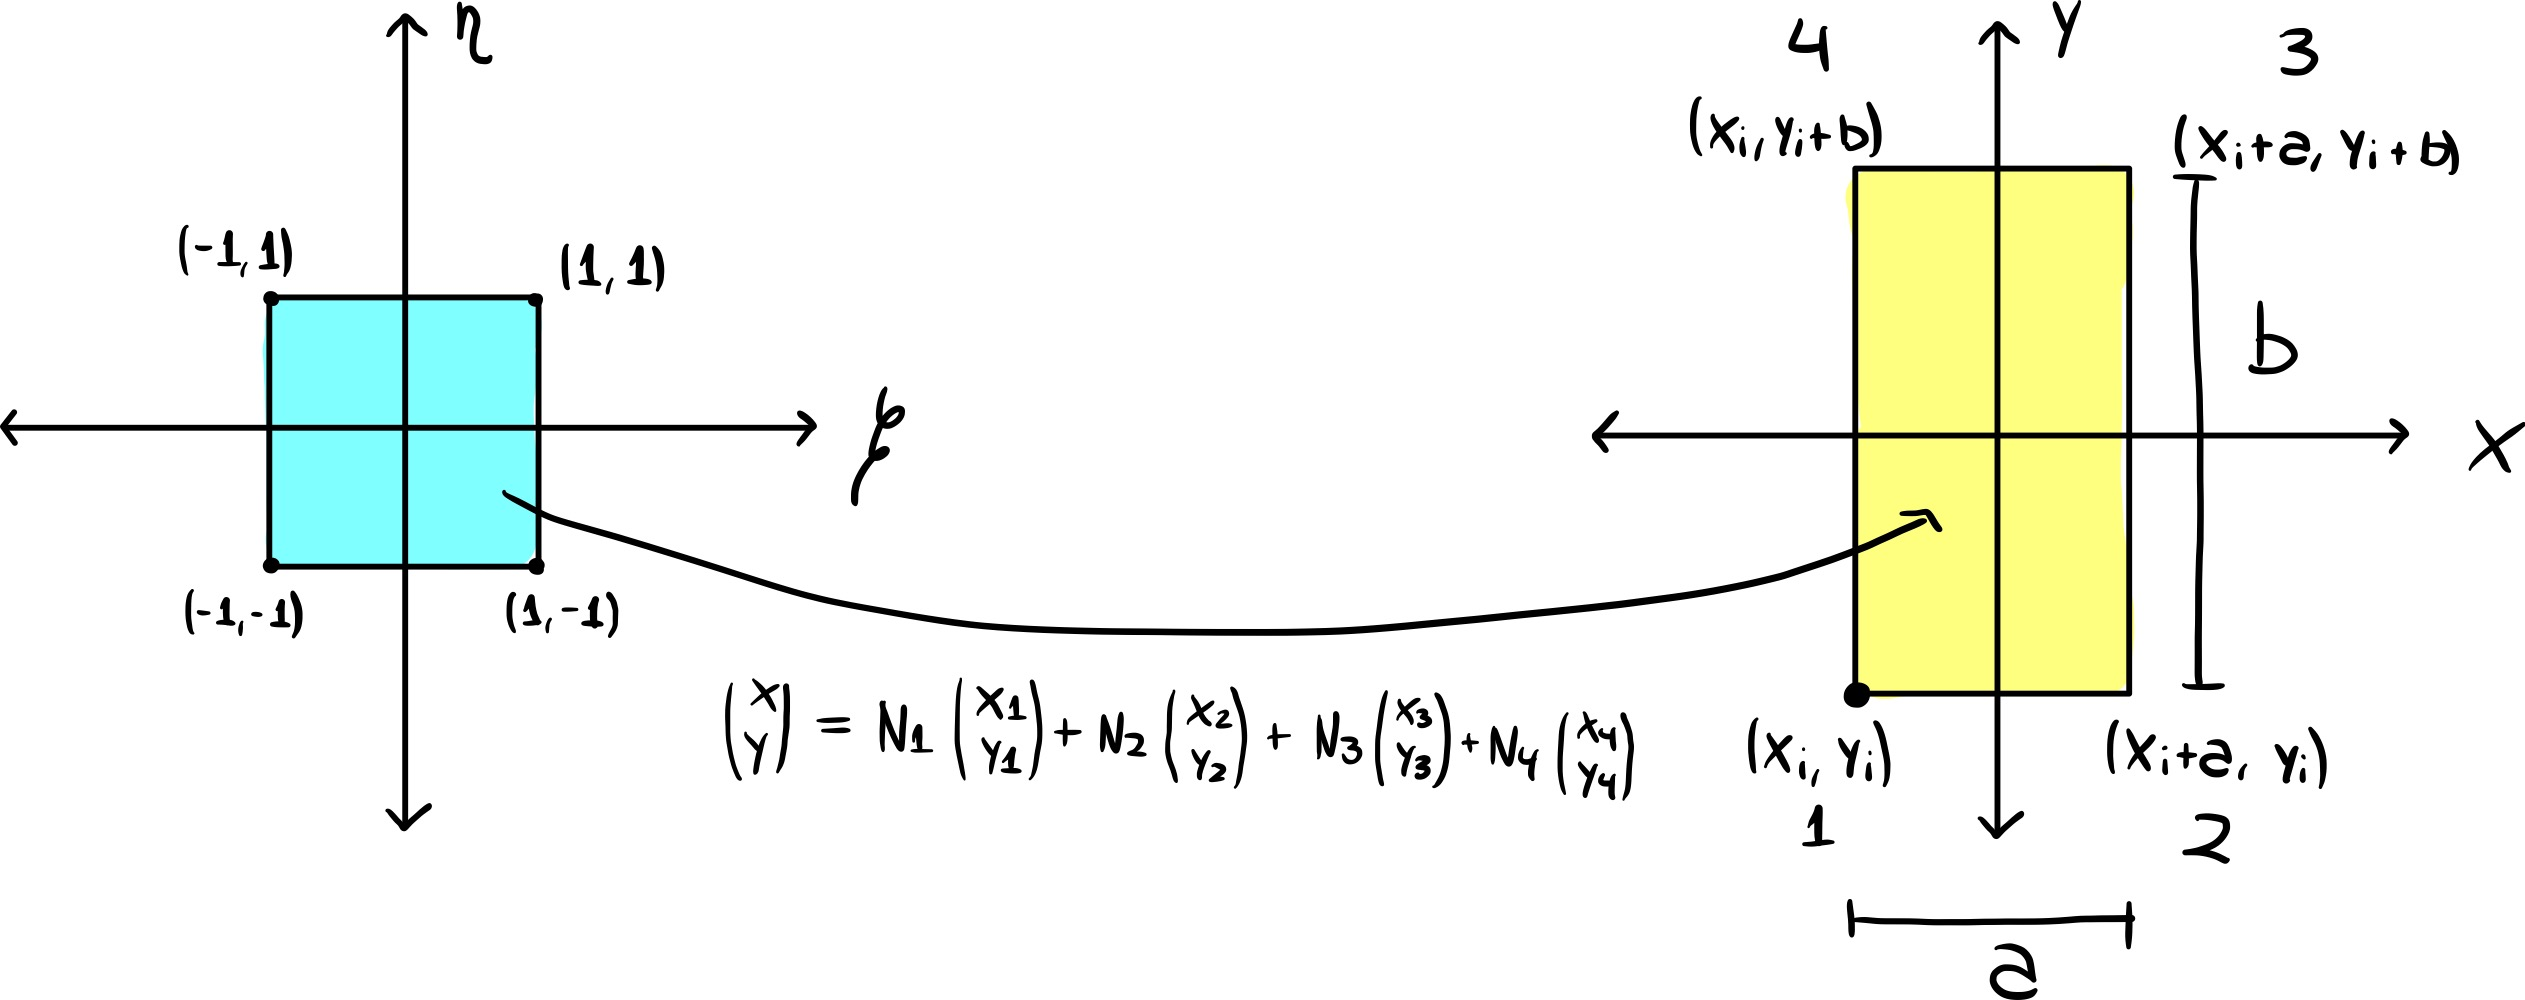

$$
x = N_1 x_1 + N_2 x_2 + N_3 x_3 + N_4 x_4\\
y = N_1 y_1 + N_2 y_2 + N_3 y_3 + N_4 y_4
$$

Donde:
- $N_1 = \frac{1}{4} (1 - \zeta)(1 - \eta)$
- $N_2 = \frac{1}{4} (1 + \zeta)(1 - \eta)$
- $N_3 = \frac{1}{4} (1 + \zeta)(1 + \eta)$
- $N_4 = \frac{1}{4} (1 - \zeta)(1 + \eta)$

Reemplazando con los valores de la imagen, se tiene:
$$
x = x_i (N_1 + N_2 + N_3 + N_4) + a(N_2 + N_3)\\
x = \frac{a}{4}(2 + 2\zeta)\\
\frac{\partial x}{\partial \zeta} = \frac{a}{2}\;\quad \frac{\partial x}{\partial \eta} = 0
$$

De forma similar:
$$
y = y_i (N_1 + N_2 + N_3 + N_4) + b(N_3 + N_4)\\
y = \frac{b}{4}(2 + 2\eta)\\
\frac{\partial y}{\partial \zeta} = 0\;\quad \frac{\partial y}{\partial \eta} = \frac{b}{2}
$$

De esta forma, el determinante de la matriz Jacobiana $J(\zeta, \eta)$ es:

$$
|J(\zeta, \eta)| = 
\begin{vmatrix}
\frac{\partial x}{\partial \zeta} & \frac{\partial x}{\partial \eta}\\
\frac{\partial x}{\partial \zeta} & \frac{\partial y}{\partial \eta}
\end{vmatrix}
= \frac{ab}{4}
$$

**Código Implementado**

Se crea una malla sobre la elipse que representa la zona donde se realizará la integral doble, la cual serán elementos cuadrados de ancho $a = b = 0.1$. Se calcula para una cuadratura de orden 0 y para una cuadratura de orden $N = 2$, comparando los resultados con el valor real obtenido utilizando WolframAlpha

![Captura de pantalla 2025-10-19 a la(s) 08.56.26.png](<attachment:Captura de pantalla 2025-10-19 a la(s) 08.56.26.png>)
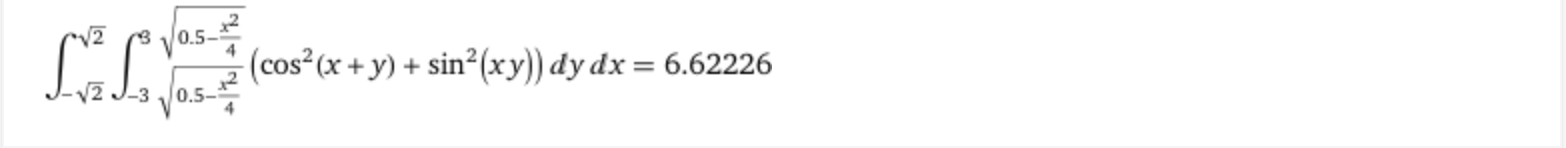

Se puede ver que la superficie donde se realizará la integral es una elipse

In [6]:
real_value = 6.62226
degree = 2
sample_points, weights = np.polynomial.legendre.leggauss(degree)

print("Sample Points:", sample_points)
print("Weights:", weights)

Sample Points: [-0.57735027  0.57735027]
Weights: [1. 1.]


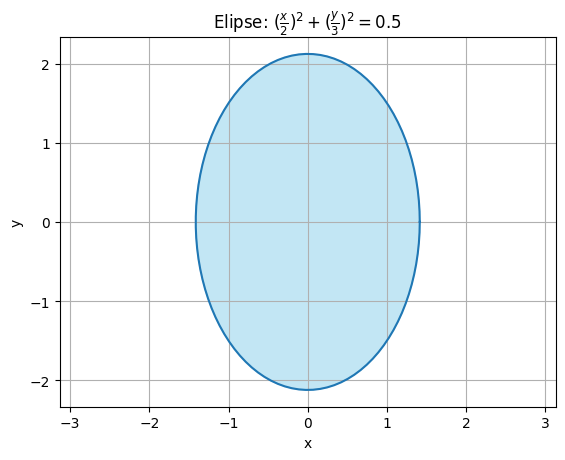

In [7]:
# Graficar la elipse (x/2)^2 + (y/3)^2 = 0.5
theta = np.linspace(0, 2 * np.pi, 100)
a = 2 * np.sqrt(0.5)  # Semi-major axis
b = 3 * np.sqrt(0.5)  # Semi-minor axis
x_ellipse = a * np.cos(theta)
y_ellipse = b * np.sin(theta)   
plt.plot(x_ellipse, y_ellipse, label='Elipse')
plt.fill(x_ellipse, y_ellipse, color='skyblue', alpha=0.5, label='Área interior')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Elipse: $(\frac{x}{2})^2 + (\frac{y}{3})^2 = 0.5$')
plt.axis('equal')
# plt.legend()
plt.grid()
plt.show()

Se crea un rectángulo con subdivisiones para poder realizar la integral dentro de esta región

283 425


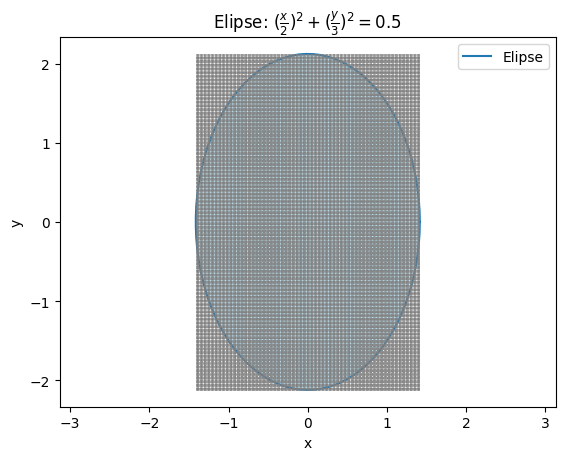

In [8]:
delta = 0.1/10
x_vals = np.arange(-a, a, delta)
y_vals = np.arange(-b, b, delta)
print(len(x_vals), len(y_vals))
plt.plot(x_ellipse, y_ellipse, label='Elipse')
plt.fill(x_ellipse, y_ellipse, color='skyblue', alpha=0.5)
for x in x_vals:
    plt.plot([x, x], [-b, b], color='gray', linestyle='--', linewidth=0.5)
for y in y_vals:
    plt.plot([-a, a], [y, y], color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Elipse: $(\frac{x}{2})^2 + (\frac{y}{3})^2 = 0.5$')
plt.axis('equal')
plt.legend()
# plt.grid()
plt.show()

Se define el siguiente cuadrado:

$$ 
(x_1, y_1) = (x_{i}, y_{j}) \\
(x_2, y_2) = (x_{i+1}, y_{j}) \\
(x_3, y_3) = (x_{i+1}, y_{j+1}) \\
(x_4, y_4) = (x_{i}, y_{j+1}) \\
$$


Si todos los puntos del cuadrado $(x_i, y_i)$ cumplen que $(\frac{x_i}{2})^2 + (\frac{y_i}{3})^2 \leq 0.5$, entonces se procederá a calcular la integral con el método de cuadratura bidimensional con el método de cuadratura de Gauss

In [9]:
# ----------------------------
# Funciones auxiliares
# ----------------------------
def verificar_punto_en_elipse(x, y):
    return (x**2 / 4) + (y**2 / 9) <= 0.5

x, y, zeta, eta = symbols('x y zeta eta')

# Función original f(x, y)
f_expr = (cos(x + y) ** 2) + (sin(x*y) ** 2)
f_np = lambdify((x, y), f_expr, "numpy")  # versión rápida

# Funciones de forma convertidas a numéricas
P_expr = (1/4) * ((1 - zeta)*(1 - eta)*x + (1 + zeta)*(1 - eta)*x + (1 + zeta)*(1 + eta)*x + (1 - zeta)*(1 + eta)*x)
Q_expr = (1/4) * ((1 - zeta)*(1 - eta)*y + (1 + zeta)*(1 - eta)*y + (1 + zeta)*(1 + eta)*y + (1 - zeta)*(1 + eta)*y)

# Lambdify real de P y Q (con nodos)
P_func = lambdify((zeta, eta, 'x1', 'x2', 'x3', 'x4'),
                  (1/4)*((1 - zeta)*(1 - eta)*symbols('x1') + 
                         (1 + zeta)*(1 - eta)*symbols('x2') + 
                         (1 + zeta)*(1 + eta)*symbols('x3') + 
                         (1 - zeta)*(1 + eta)*symbols('x4')), "numpy")

Q_func = lambdify((zeta, eta, 'y1', 'y2', 'y3', 'y4'),
                  (1/4)*((1 - zeta)*(1 - eta)*symbols('y1') + 
                         (1 + zeta)*(1 - eta)*symbols('y2') + 
                         (1 + zeta)*(1 + eta)*symbols('y3') + 
                         (1 - zeta)*(1 + eta)*symbols('y4')), "numpy")

# ----------------------------
# Cálculo de integrales
# ----------------------------
integral_cuadratura_simple = 0.0
integral_cuadratura_gauss = 0.0

start = time.time()

for j in range(len(y_vals) - 1):
    for i in range(len(x_vals) - 1):
        x1, y1 = x_vals[i], y_vals[j]
        x2, y2 = x_vals[i+1], y_vals[j]
        x3, y3 = x_vals[i+1], y_vals[j+1]
        x4, y4 = x_vals[i], y_vals[j+1]
        
        # Verificar si los cuatro vértices están dentro de la elipse
        if (verificar_punto_en_elipse(x1, y1) and
            verificar_punto_en_elipse(x2, y2) and
            verificar_punto_en_elipse(x3, y3) and
            verificar_punto_en_elipse(x4, y4)):

            Jacobian = (delta * delta) / 4

            # Cuadratura simple
            integral_cuadratura_simple += f_np(x1 + (delta / 2), y1 + (delta / 2)) * delta * delta

            # Cuadratura de Gauss bidimensional
            sumatoria = 0.0
            for alpha in range(degree):
                for beta in range(degree):
                    x_eval = P_func(sample_points[alpha], sample_points[beta], x1, x2, x3, x4)
                    y_eval = Q_func(sample_points[alpha], sample_points[beta], y1, y2, y3, y4)
                    sumatoria += weights[alpha] * weights[beta] * f_np(x_eval, y_eval) * Jacobian
            integral_cuadratura_gauss += sumatoria

# ----------------------------
# Resultados
# ----------------------------
print(f"\nIntegral mediante cuadratura simple: {integral_cuadratura_simple}")
print(f"Integral mediante cuadratura de Gauss bidimensional: {integral_cuadratura_gauss}")
print(f"Error: {(real_value - integral_cuadratura_gauss) / real_value * 100:.3f}%")


Integral mediante cuadratura simple: 6.544551168732871
Integral mediante cuadratura de Gauss bidimensional: 6.544601208279985
Error: 1.173%


Se puede ver que, si bien son valores parecidos, la cuadratura de Gauss bidimensional es la que más se acerca al valor original de la integral. Además, utilizando una malla rectangular se demuestra que se debe realizar una graduación muy fina para poder aproximarse al valor real. Se propone probar con otro tipo de geometría (por ejemplo, triángulos) que cubran de mejor manera la superficie a integrar sin necesidad de tener que realizar un mallado tan fino utilizando un mallado rectángular.

Fuentes:
1. ICM3920-Clase12
2. https://numfactory.upc.edu/web/Calculo2/P2_Integracio/html/Integral2DQuad.html
3. https://www.wolframalpha.com/input?i=double+integral+calculator&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend2%22%7D+-%3E%223*sqrt%280.5+-+%28x%2F2%29%5E2%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangeend1%22%7D+-%3E%22sqrt%282%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22integrand%22%7D+-%3E%22Cos%5E2%28x%2By%29+%2B+Sin%5E2%28x*y%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable1%22%7D+-%3E%22x%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart1%22%7D+-%3E%22-sqrt%282%29%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22intvariable2%22%7D+-%3E%22y%22&assumption=%7B%22F%22%2C+%22DoubleIntegral%22%2C+%22rangestart2%22%7D+-%3E%22-3*sqrt%280.5+-+%28x%2F2%29%5E2%29%22
4. ChatGPT
5. GitHub Copilot

## 6) El sistema de esta figura está gobernado por el siguiente sistema de ODEs:

$$ m\ddot{x}_1 + b_1\dot{x}_1 + b_3 (\dot{x}_2 - \dot{x}_1) + k_1x_1 = 0 \\
(b_2 + b_3)\dot{x}_2 - b_3 \dot{x}_1 + k_3 x_2 = 0
$$

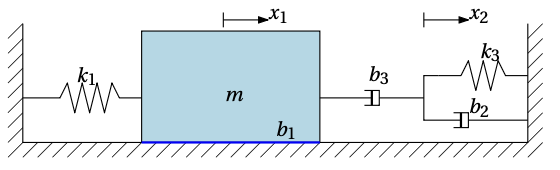

## Grafique la evolución de $x_1$ y $x_2$ en el tiempo, usando los siguientes valores ($x_1^0 = 0.5$ m)

$$
m = 10 \;kg \quad k_1 = 1.5 \; kg/s^2 \\
b_3 = 1.5 \; kg/s  \quad k_3 = 1.4 \; kg/s^2\\
b_1 = 1.6 \; kg/s  \quad b_2 = 0.8 \; kg/s\\
$$


Se posee un sistema de ecuaciones diferenciales de segundo orden. Se pueden plantear el siguiente cambio de variable para plantearlo como un sistema de ecuaciones de primer orden

$$
y_1 = \dot{x}_1
$$

Así, se obtiene el siguiente sistema de ecuaciones diferenciales de primer orden:

$$
\frac{d}{dt}
\begin{pmatrix}
x_1\\
x_2\\
y_1\\
\end{pmatrix}
= 
\begin{pmatrix}
y_1\\
\frac{b_3x_1 - k_3x_2}{b_2 + b_3}\\
\frac{-b_1y_1 - b_3((\frac{b_3x_1 - k_3x_2}{b_2 + b_3}) - y_1) - k_1x_1}{m}
\end{pmatrix}
$$

El cual es un sistema de la siguiente forma:

$$
\frac{d \vec{y}}{dt} = \vec{f}(\vec{y})
$$

El cual se puede resolver con el método Runge-Kutta clásico de cuarto orden, el cual proviene de resolver $\int dy = \int f(y(t)) dt$ aplicando una cuadratura para resolver la integral. Aplicando este método se tiene:

$$
\vec{y}_{n+1} = \vec{y}_n + \frac{\vec{k}_1 + 2\vec{k}_2 + 2\vec{k}_3 + \vec{k}_4}{6}
$$

Donde:

$$
\vec{k}_1 = h\cdot f(\vec{y}_n)\\
\vec{k}_2 = h\cdot f(\vec{y}_n + \frac{1}{2}\vec{k}_1)\\
\vec{k}_3 = h\cdot f(\vec{y}_n + \frac{1}{2}\vec{k}_2)\\
\vec{k}_4 = h\cdot f(\vec{y}_n + \vec{k}_3)\\
$$
**Código Implementado**

Se implementa el método R-K clásico de cuarto orden considerando las siguientes condiciones iniciales:

$$
\vec{y}_0 = 
\begin{pmatrix}
0.5\\
\frac{b_3 x_1(0)}{k_3}\\
0\\
\end{pmatrix}
$$

Se define un paso de tiempo de $h = 0.25$ y se grafica hasta $t = 70$ segundos. 

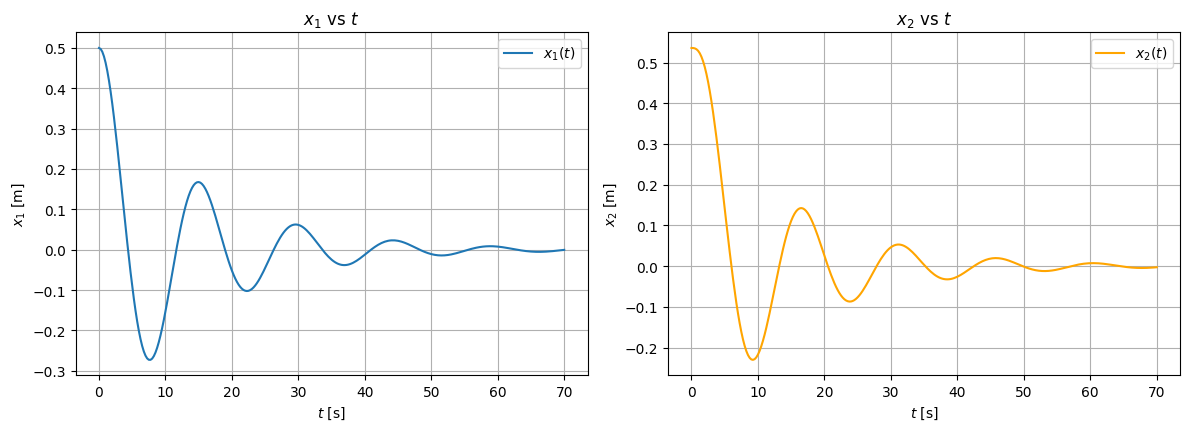

In [10]:
# Variables del problema
m = 10
b3 = 1.5
b1 = 1.6
k1 = 1.5
k3 = 1.4
b2 = 0.8

# Función vectorial que representa el sistema de ecuaciones
def f(y):
    x1 = y[0]
    x2 = y[1]
    y1 = y[2]

    f1 = y1
    f2 = ((b3 * x1) - (k3 * x2) ) / (b2 + b3)
    f3 = ((-b1 * y1) - (b3 * (f2 - y1)) - (k1 * x1)) / m

    return np.array([f1, f2, f3])

y_0 = np.array([0.5, b3 * 0.5 / k3, 0]) # Condiciones iniciales: x1(0), x2(0), y1(0)
h = 0.25 # intervalo de tiempo
t_final = 70
num_steps = int(t_final / h)

# Almacenamiento de resultados
y_t = [y_0]
dot_y_t = [f(y_0)]

# Método de Runge-Kutta clásico de cuarto orden
for n in range(num_steps):
    rk1 = h * f(y_0)
    rk2 = h * f(y_0 + 0.5 * rk1)
    rk3 = h * f(y_0 + 0.5 * rk2)
    rk4 = h * f(y_0 + rk3)

    y_1 = y_0 + (rk1 + 2*rk2 + 2*rk3 + rk4) / 6
    y_0 = y_1

    y_t.append(y_0)
    dot_y_t.append(f(y_0))

# Graficar resultados
y_t = np.array(y_t)
dot_y_t = np.array(dot_y_t) 
time_array = np.linspace(0, t_final, num_steps + 1)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(time_array, y_t[:, 0], label=r'$x_1(t)$')
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'$x_1$ [m]')
plt.title(r'$x_1$ vs $t$')
plt.grid()
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(time_array, y_t[:, 1], label=r'$x_2(t)$', color='orange')
plt.xlabel(r'$t$ [s]')
plt.ylabel(r'$x_2$ [m]')
plt.title(r'$x_2$ vs $t$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

Se puede ver que los resultados muestran una respuesta subamortiguada, lo cual es esperable cuando se tienen este tipo de sistemas de bloque-resorte-amortiguador, tendiendo a 0 después de un tiempo considerable

Fuentes:
1. ICM3920-Clase13
2. ChatGPT
3. GitHub Copilot

## 7) Obtenga aproximaciones de primer, segundo y tercer orden para la primera derivada de $f(x) = -0.1x^4 -0.15x^3 -0.5x^2 - 0.25x + 1.2$ en el punto $x = 0.5$. Use un paso constante $\Delta x = 0.25$ para comparar las aproximaciones

Por definición, la derivada en un punto está definida por:

$$
f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h}
$$

El método de diferencias finitas consiste en utilizar un h lo suficientemente chico para evaluar la derivada simplemente como una fracción en vez de como un límite, resultando en

$$
f'(x) \approx \frac{f(x + h) - f(x)}{h}
$$

Esta definición es importante cuando se poseen una colección de puntos $u_i$ distanciados a una distancia $h$. Se puede definir la derivada por diferencias finitas de tres formas distintas:

1. Diferencias progresivas: $f'(x) \approx \frac{u_{i+1} - u_i}{h}$
2. Diferencias retrógradas: $f'(x) \approx \frac{u_{i} - u_{i-1}}{h}$
3. Diferencias centradas: $f'(x) \approx \frac{u_{i+1} - u_{i-1}}{2h}$

La que menor error posee de estas tres derivadas es la derivada por diferencias centradas. Sin embargo, el error se puede disminuir si se utilizan series de Taylor para poder aproximarar de mejor manera la derivada.

Aplicando Taylor de segundo orden para $u_{i+1}$ en función de $u_i$ se tiene:

$$
u_{i+1} = u_i + h(\frac{du}{dx})|_i + \frac{h^2}{2!}(\frac{d^2u}{dx^2})|_i
$$

Despejando, se obtiene que:

$$
(\frac{du}{dx})|_i = \frac{u_{i+1} - u_i}{h} - \frac{h}{2!}(\frac{d^2u}{dx^2})|_i
$$

Donde la segunda derivada tiene la siguiente aproximación por diferencias finitas:

$$
(\frac{d^2u}{dx^2})|_i \approx \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2}
$$

De forma similar, se puede plantear una aproximación de tercer orden usando series de Taylor.

$$
u_{i+1} = u_i + h(\frac{du}{dx})|_i + \frac{h^2}{2!}(\frac{d^2u}{dx^2})|_i + \frac{h^3}{3!}(\frac{d^3u}{dx^3})|_i 
$$

De donde se obtiene:

$$
(\frac{du}{dx})|_i = \frac{u_{i+1} - u_i}{h} - \frac{h}{2!}(\frac{d^2u}{dx^2})|_i - \frac{h^2}{3!}(\frac{d^3u}{dx^3})|_i 
$$

Donde la tercera derivada tiene la siguiente aproximación por diferencias finitas:

$$
(\frac{d^3u}{dx^3})|_i \approx \frac{u_{i+2} - 2u_{i+1} + 2u_{i-1} - u_{i-2}}{2h^3}
$$

**Código Implementado**

Se crea un código donde se calcula analíticamente la derivada de la función y se evalúa en el punto $x = 0.5$. Considerando un paso $h = 0.25$ se calcula la derivada por diferencias finitas de primer, segundo y tercer orden usando diferencias progresivas, comparando también el error que posee con respecto al valor real.

In [11]:
def f(x):
    return (-0.1 * x**4) - (0.15 * x**3) - (0.5 * x**2) - (0.25 * x) + 1.2

def dfdx_function(x):
    return (-0.4 * x**3) - (0.45 * x**2) - (1.0 * x) - 0.25


x0 = 0.5
h = 0.25

u_i = f(x0)
u_i_siguiente = f(x0 + h)
u_i_anterior = f(x0 - h)

# Valor exacto de la derivada en x0
dudx_exacta = dfdx_function(x0)
print(f"Valor exacto de la derivada en x0: {dudx_exacta}")

# Aproximación de primer orden
dudx_1 = (u_i_siguiente - u_i) / (h)
print(f"Aproximación de primer orden: {dudx_1:.4f}, Error: {(dudx_exacta - dudx_1) / dudx_exacta * 100:.3f}%")


# Aproximación de segundo orden
d2u_dx2_aproximado = (u_i_siguiente - (2 * u_i) + u_i_anterior) / (h ** 2)
dudx_2 = dudx_1 - ((h / 2) * d2u_dx2_aproximado)
print(f"Aproximación de segundo orden: {dudx_2:.4f}, Error: {(dudx_exacta - dudx_2) / dudx_exacta * 100:.3f}%")

# Aproximación de tercer orden
d3u_dx3_aproximado = (f(x0 + 2*h) - (2 * u_i_siguiente) + (2 * u_i_anterior) - f(x0 - 2*h)) / (2 * h**3)
dudx_3 = dudx_2 - ((h**2 / 6) * d3u_dx3_aproximado)
print(f"Aproximación de tercer orden: {dudx_3:.4f}, Error: {(dudx_exacta - dudx_3) / dudx_exacta * 100:.3f}%")



Valor exacto de la derivada en x0: -0.9125
Aproximación de primer orden: -1.1547, Error: -26.541%
Aproximación de segundo orden: -0.9344, Error: -2.397%
Aproximación de tercer orden: -0.9125, Error: -0.000%


Se puede ver que la aproximación de primer orden tiene un error bastante grande. Al aumentar el grado de la aproximación disminuye significativamente el error. Sin embargo, no siempre es viable utilizar estas aproximaciones, debido a que por ejemplo no podemos conocer $u_{-2}$, cuando estamos resolviendo una ecuación diferencial desde $t = 0$, por lo que no se podría utilizar una aproximación de tercer orden.

Fuentes:
1. ICM3920-Clase14
2. https://www.u-cursos.cl/ingenieria/2011/2/CI6106/1/material_docente/bajar?id_material=399041
3. ChatGPT
4. GitHub Copilot

## 8) Implemente la Ecuación de Advección Pura con un esquema implícito, y analice el comportamiento frente a cambios en los parámetros ($\Delta x$, $\Delta t$ y $c$)

La ecuación de advección pura es de la siguiente forma:
$$ \frac{\partial \phi}{\partial t} + c \frac{\partial \phi}{\partial x} = 0$$

Usando una diferenciación finita progresiva para $(\frac{\partial \phi}{\partial t})_i$ y una diferenciación finita retrógrada para $(\frac{\partial \phi}{\partial x})^{n+1}$ se tiene:
$$
\frac{u_i^{n+1} - u_i^n}{\Delta t} + c\frac{u_{i}^{n+1} - u_{i-1}^{n+1}}{\Delta x} = 0
$$
Así, reorganizando se obtiene que:
$$
{u_i^{n+1} - u_i^n} + C(u_{i}^{n+1} - u_{i-1}^{n+1}) = 0
$$

$$
u_i^{n+1} + Cu_i^{n+1} - Cu_{i-1}^{n+1} = u_i^n
$$

$$
u_i^{n+1}(1 + C) - Cu_{i-1}^{n+1} = u_i^n
$$

Donde $C = \frac{c\Delta t}{\Delta x}$. Las condiciones iniciales son:

- $u(0, t) = 0$
- $u(x, 0) = \begin{cases}
1 & \text{si } x \in [3\Delta x, 7\Delta x] \\
0 & \text{en otro caso }
\end{cases}$


De esta forma se obtiene un esquema implícito, el cual será resuelto a continuación resolviendo el siguiente sistema de ecuaciones.

$$
A\vec{u}^{n+1} = B\vec{u}^n
$$

Para este caso, $B$ sería la matriz identidad y $A$ sería la siguiente matriz:

$$
A =
\begin{bmatrix}
1      & 0      & 0      & 0      & \cdots & 0 \\
-C     & 1 + C  & 0      & 0      & \cdots & 0 \\
0      & -C     & 1 + C  & 0      & \cdots & 0 \\
0      & 0      & -C     & 1 + C  & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \ddots & \vdots \\
0      & 0      & 0      & \cdots & -C     & 1 + C
\end{bmatrix}
$$

Notar que la posición [0,0] de la matriz posee un 1 por la condicion inicial de $u(0, t) = 0$, lo cual quiere decir que siempre se cumple que $u_{0}^n = u_0^{n+1}$. Por su parte, el vector $\vec{u}^{n+1}$ y el vector $\vec{u}^{n}$ están dados por:

$$
\vec{u}^{n+1} = \begin{bmatrix}
u_0^{n+1} \\[4pt]
u_1^{n+1} \\[4pt]
u_2^{n+1} \\[4pt]
u_3^{n+1} \\[4pt]
\vdots    \\[4pt]
u_{N}^{n+1}
\end{bmatrix}
$$

$$
\vec{u}^{n} = \begin{bmatrix}
u_0^{n} \\[4pt]
u_1^{n} \\[4pt]
u_2^{n} \\[4pt]
u_3^{n} \\[4pt]
\vdots    \\[4pt]
u_{N}^{n}
\end{bmatrix}
$$

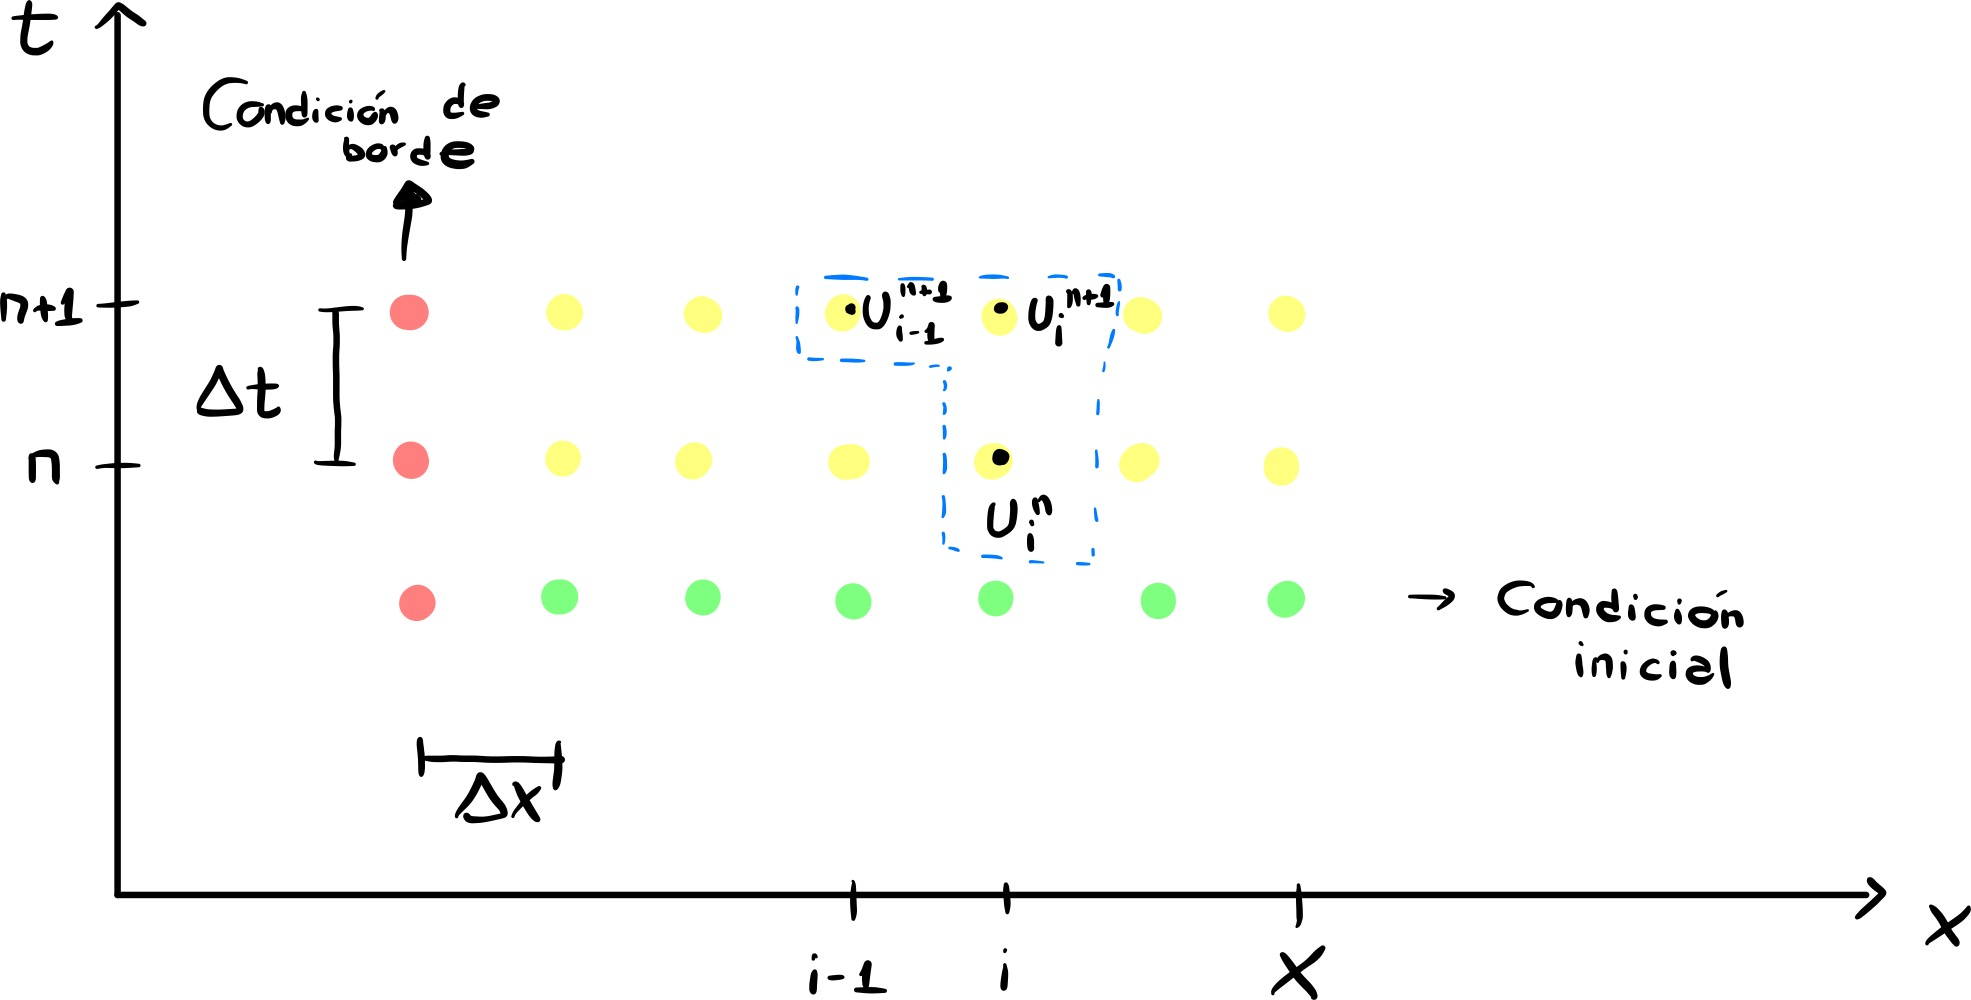

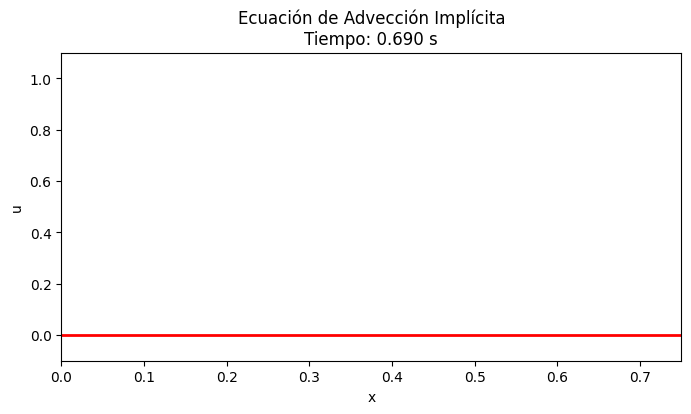

In [12]:
# Parámetros
delta_x = 0.05
delta_t = 0.01
c = 5
C = c * delta_t / delta_x

x = np.arange(0, 0.75 + delta_x, delta_x)
t = np.arange(0, 0.675 + delta_t, delta_t)

n = len(x)
m = len(t)

# Condición inicial
u0 = [0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0]

# Matriz A del sistema implícito
A = np.zeros((n, n))

for i in range(n):
    if i == 0:
        A[i, i] = 1.0  # frontera fija u(0,t) = 0
    else:
        A[i, i] = 1 + C
        A[i, i - 1] = -C

# Precalcular la inversa de A
A_inv = np.linalg.inv(A)

# Inicialización
u = u0.copy()
u_hist = [u.copy()]

# Bucle temporal
for n in range(m):
    b = u.copy()
    b[0] = 0  # condición de frontera u(0,t) = 0
    u = A_inv @ b
    u_hist.append(u.copy())

# Crear figura
fig, ax = plt.subplots(figsize=(8, 4))
line, = ax.plot(x, u_hist[0], lw=2, color='red')
ax.set_xlim(0, 0.75)
ax.set_ylim(-0.1, 1.1)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_title('Ecuación de Advección Implícita')

# Función de actualización para la animación
def update(frame):
    line.set_ydata(u_hist[frame])
    ax.set_title(f'Ecuación de Advección Implícita\nTiempo: {frame*delta_t:.3f} s')
    return line,

# Crear animación
anim = FuncAnimation(fig, update, frames=len(u_hist), interval=100, blit=True)

# Mostrar animación en Jupyter
HTML(anim.to_jshtml())

Se puede ver que el esquema implícito produce difusión, independiente del número de Courant utilizado (la simulación esta hecha para $C = 1$).

Fuentes:
1. ICM3920-Clase15
2. https://www.youtube.com/watch?v=2b4Q_uE4zhk
3. ChatGPT
4. GitHub Copilot

## Bonus: Demuestre que un esquema implícito **siempre** produce difusión numérica, independiente de la combinación de parámetros